In [4]:
%cd /data/ajay/contracode
%pwd
import pandas as pd
import plotnine as p9
%matplotlib inline
import jsonlines
import random
from pprint import pprint
from tqdm.auto import tqdm
import pickle
from collections import defaultdict, Counter

/data/ajay/contracode


In [5]:
def load_data(fname):
    with jsonlines.open(fname) as reader:
        return list(reader)
data = load_data('data/codesearchnet_javascript/javascript_train_supervised.jsonl')

def extract_fields(fields, gen):
    for item in gen:
        yield 

def parse_data(key, data):
    matches = filter(lambda x: key.lower() == x['func_name'].lower(), data)
    extracted_matches = map(lambda item: {k: v for k, v in item.items() if k in ['func_name', 'code']}, matches)
    return list(extracted_matches)

matches = defaultdict(list)
for x in tqdm(data):
    matches[x['func_name'].lower()].append(x['code'])

match_counts = Counter()
for k, v in matches.items():
    match_counts[k] += len(v)

In [11]:
match_counts.most_common(25)

[('init', 282),
 ('parse', 242),
 ('get', 186),
 ('create', 181),
 ('validate', 145),
 ('run', 144),
 ('update', 128),
 ('extend', 127),
 ('merge', 111),
 ('set', 109),
 ('render', 105),
 ('transform', 103),
 ('resolve', 100),
 ('main', 99),
 ('request', 98),
 ('log', 98),
 ('add', 95),
 ('load', 93),
 ('format', 90),
 ('client', 90),
 ('compile', 87),
 ('start', 87),
 ('find', 84),
 ('normalize', 83),
 ('clone', 81)]

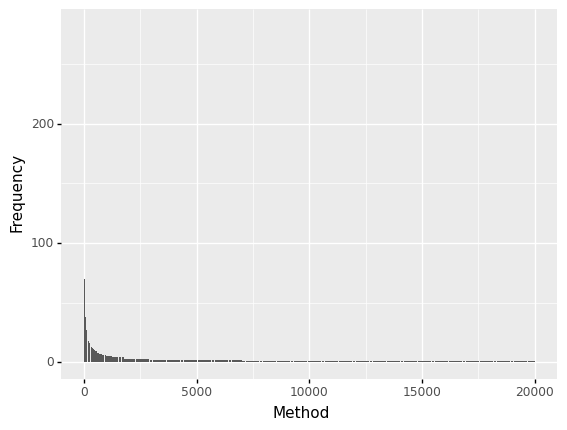

<ggplot: (8774522935022)>

In [58]:
%time dataset_indexes = list(enumerate(x[1] for x in match_counts.most_common(20000)))
%time df = pd.DataFrame(dataset_indexes, columns=['Method', 'Frequency'])
(p9.ggplot(df, p9.aes(x="Method", y="Frequency")) + p9.geom_bar(stat = "identity"))

In [6]:
top_methods = set(x[0] for x in match_counts.most_common(500))
df_data = []
for method in tqdm(top_methods):
    df_data.extend(parse_data(method, data))
grouped_methods_df = pd.DataFrame(df_data)

In [8]:
grouped_methods_df.to_pickle('data/tsne/supervised_top500_groups_df.pickle') 
grouped_methods_df

,func_name,code
0,listen,"function listen(name, callback) {\n if (!sh..."
1,listen,"function listen(channel, onChange) {\n ..."
2,listen,"function listen(model, listener) {\n model...."
3,listen,function listen (conn) {\n if (conn._listenin...
4,listen,function listen() {\n // Callers should onl...
...,...,...
12869,resolveUrl,"function resolveUrl (from, to) {\n if (typeof..."
12870,resolveURL,function resolveURL (args) {\n var from = a...
12871,resolveURL,function resolveURL (args) {\n var from = a...
12872,resolveUrl,"function resolveUrl( url, contextUrl, ignoreSa..."


# Pack augmented dataset

In [11]:
with open('/dev/shm/javascript_augmented.pickle', 'rb') as f:
    dataset = pickle.loads(f.read())

In [18]:
import modin.pandas as pd
df = pd.DataFrame(dataset)

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


KeyboardInterrupt: 

In [49]:
import pandas as pd
import random
shuffled_list = list(range(len(dataset)))
random.shuffle(shuffled_list)
sample_10k = [dataset[i] for i in shuffled_list[:10000]]
sample_df = pd.DataFrame([dict(text=list(x)) for x in sample_10k], columns=['text'])
sample_df.to_pickle('/data/ajay/contracode/data/codesearchnet_javascript/augmented_10k_subset.pickle')

In [50]:
pd.read_pickle('/data/ajay/contracode/data/codesearchnet_javascript/augmented_10k_subset.pickle')

,text
0,[function x() {\n self.logger.debug('TLS conn...
1,"[const x=function(e){utils.each(_plugins,(func..."
2,[function x() {\n var res = {};\n Object.def...
3,[const x=function(e){e.root.walkAtRules(a=>{is...
4,"[function x(t,a,e,i){return proxy(getValidatab..."
...,...
9995,"[const x = function (err, docs) {\n console.l..."
9996,[const x = function () {\n var thrown = null;...
9997,"[function x(e){var t,o;return e._opts.$data?(t..."
9998,[const x = function () {\n var ready = /loade...


In [60]:
moco_path = "data/tsne/moco_embed.pickle"
!ls -lah {moco_path}
with open(moco_path, 'rb') as f:
    x = f.read()

-rw-rw-r--+ 1 ajay ajay 296M Sep 29 19:50 data/tsne/moco_embed.pickle


In [63]:
data = pickle.loads(x)

In [70]:
data[0][0]

(tensor([  28,   35,   63,   13,  139,    9, 1138,    9,  503,   52, 5370,  123,
         1579,    8,   16,   18,  939,   53, 3657,   16,   32,  109,   43,    8,
           16,   14,    8,  963,    9, 2055, 2615,  573,    9,  193,  141,   82,
         7381,  204,   13,   31,   75,   82, 1315,  204,   42, 4182,   19,   72,
           37, 2940,   19,  631,    9, 2458,    9, 2940,    9,   24,   69,    9,
         1544,  861,   58,   82,   85,  204,    8,  963,    9, 2055, 2615,  573,
            9, 1257,   10,   16,   12,    9, 1721,   63,   75,   20],
        device='cuda:0'),
 array([[-0.28644446,  0.02720123, -0.0242163 , -0.30001178,  0.27885008,
          0.03558757,  0.02287879, -0.18285109,  0.12746602,  0.07854375,
          0.30898374,  0.23363793, -0.25640497, -0.2654791 ,  0.15940927,
          0.06181588, -0.06521805,  0.07064383, -0.17659038,  0.24695203,
         -0.00306341, -0.5929063 ,  0.1109065 , -0.09932823,  0.55946326,
         -0.59673893, -0.2532683 , -0.14764844, 